# Machine Learning Project : Mushroom classification

## 1. Introduction

### 📌 Project Title  
**Mushroom Classification: Predicting Edibility Using Machine Learning**  

### 🎯 Objective  
The goal of this project is to develop a machine learning model that can accurately classify mushrooms as **edible or poisonous** based on their physical characteristics. By leveraging different classification algorithms, we aim to identify the most effective model for this task.  

### 🛑 Problem Statement  
Foraging for mushrooms can be dangerous, as some species are highly toxic and visually similar to edible varieties. Misidentification can lead to severe poisoning or fatal consequences. This project seeks to create a **data-driven solution** that can assist foragers, researchers, and mycologists in determining whether a given mushroom is safe for consumption.  

### 📊 Dataset Description  
- **Dataset Name**: UCI Mushroom Dataset  
- **Source**: UCI Machine Learning Repository  
- **Total Samples**: 8,124 mushrooms  
- **Features**: 22 categorical attributes describing physical characteristics (e.g., cap shape, odor, gill size, stalk type).  
- **Target Variable**:  
  - **"e"** → Edible  
  - **"p"** → Poisonous  
- **Notable Features**:  
  - **Odor** is highly indicative of edibility.  
  - Some attributes have missing values (e.g., stalk-root), requiring preprocessing.  

### 📏 Evaluation Metrics  
To assess model performance, we use the following key metrics:  
- **Accuracy** → Measures overall classification correctness.  
- **Precision** → Evaluates how many predicted poisonous mushrooms are actually poisonous.  
- **Recall** → Ensures poisonous mushrooms are correctly identified.  
- **F1-Score** → Provides a balance between precision and recall.  

By comparing multiple models (Logistic Regression, Random Forest, SVM, and Neural Networks) using cross-validation, we aim to determine the **most effective classification model** for safe mushroom identification.




## 2. Data Collection
- [Mushroom dataset link](https://www.kaggle.com/datasets/uciml/mushroom-classification/data)



## 3. Exploratory Data Analysis (EDA)


- **Loading the Data**:
  - Inspect the dataset (e.g., `.head()`, `.info()`, `.describe()`).


In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('mushrooms.csv')

In [254]:
df.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [255]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [257]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [258]:
for col in df.columns:
    print(col, df[col].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


- **Handling Missing Data**:
  - Identify and treat missing values.


In [259]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

- **Univariate Analysis**:
  - Analyze individual features (e.g., histograms, box plots).


In [260]:
df_vis = df.copy()

df_vis['class'] = df_vis['class'].map({'e': 'edible', 'p': 'poisonous'})
df_vis['cap-shape'] = df_vis['cap-shape'].map({'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'})
df_vis['cap-surface'] = df_vis['cap-surface'].map({'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'})
df_vis['cap-color'] = df_vis['cap-color'].map({'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'})
df_vis['bruises'] = df_vis['bruises'].map({'t': 'bruises', 'f': 'no bruises'})
df_vis['odor'] = df_vis['odor'].map({'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'})
df_vis['gill-attachment'] = df_vis['gill-attachment'].map({'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'})
df_vis['gill-spacing'] = df_vis['gill-spacing'].map({'c': 'close', 'w': 'crowded', 'd': 'distant'})
df_vis['gill-size'] = df_vis['gill-size'].map({'b': 'broad', 'n': 'narrow'})
df_vis['gill-color'] = df_vis['gill-color'].map({'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'})
df_vis['stalk-shape'] = df_vis['stalk-shape'].map({'e': 'enlarging', 't': 'tapering'})
df_vis['stalk-root'] = df_vis['stalk-root'].map({'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'})
df_vis['stalk-surface-above-ring'] = df_vis['stalk-surface-above-ring'].map({'s': 'smooth', 'k': 'silky', 'f': 'fibrous', 'y': 'scaly'})
df_vis['stalk-surface-below-ring'] = df_vis['stalk-surface-below-ring'].map({'s': 'smooth', 'k': 'silky', 'f': 'fibrous', 'y': 'scaly'})
df_vis['stalk-color-above-ring'] = df_vis['stalk-color-above-ring'].map({'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'})
df_vis['stalk-color-below-ring'] = df_vis['stalk-color-below-ring'].map({'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'})
df_vis['veil-color'] = df_vis['veil-color'].map({'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'})
df_vis['ring-number'] = df_vis['ring-number'].map({'n': 'none', 'o': 'one', 't': 'two'})
df_vis['ring-type'] = df_vis['ring-type'].map({'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'})
df_vis['spore-print-color'] = df_vis['spore-print-color'].map({'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'})
df_vis['population'] = df_vis['population'].map({'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'})
df_vis['habitat'] = df_vis['habitat'].map({'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'})




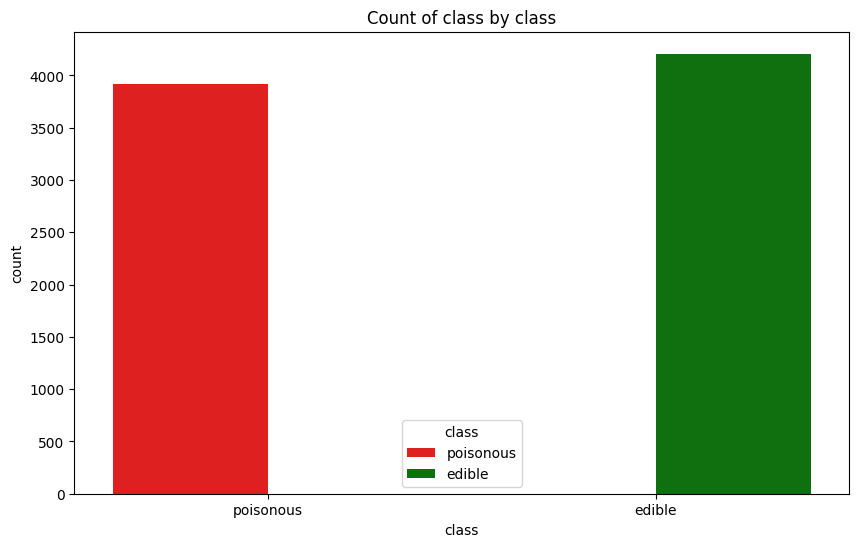

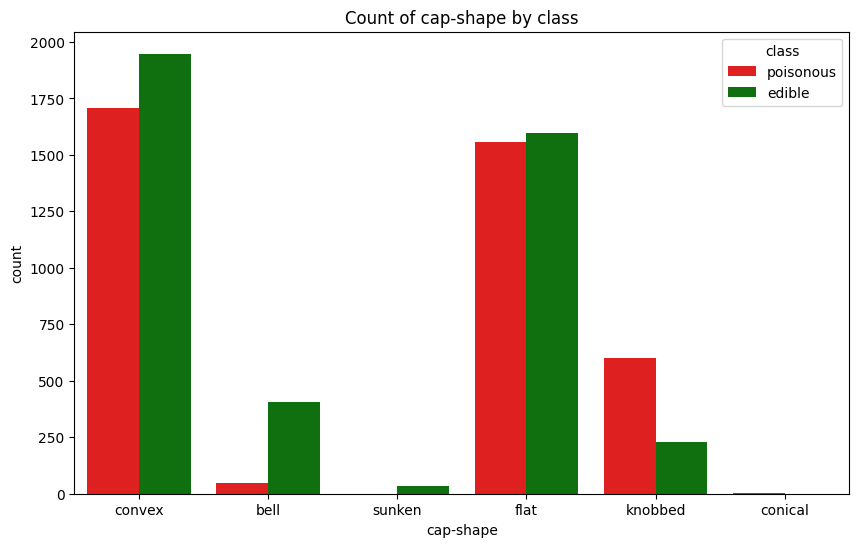

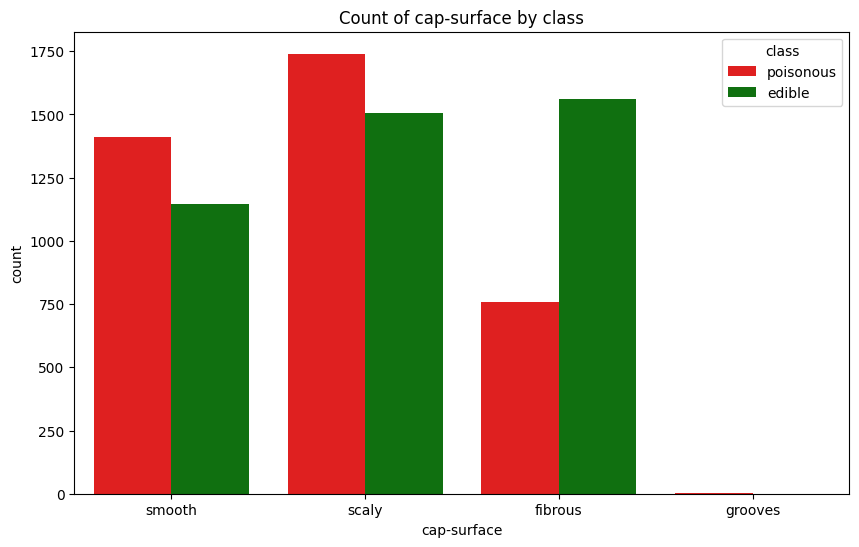

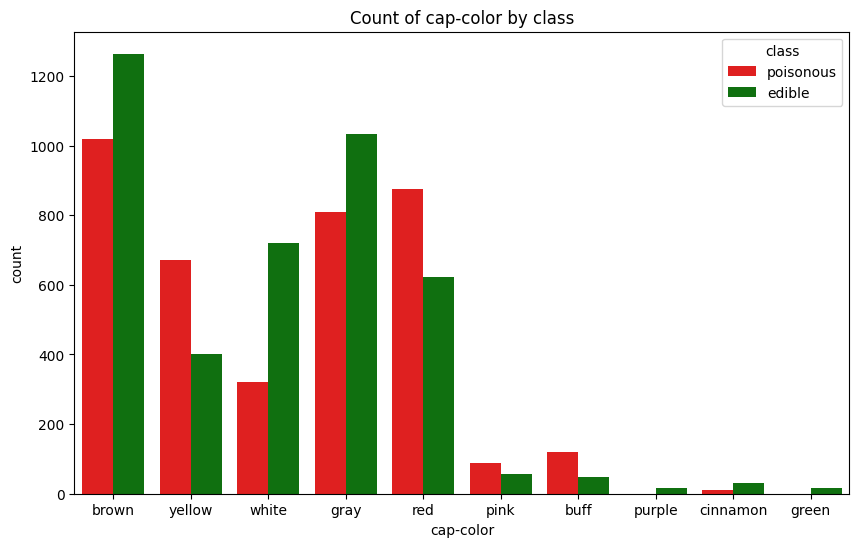

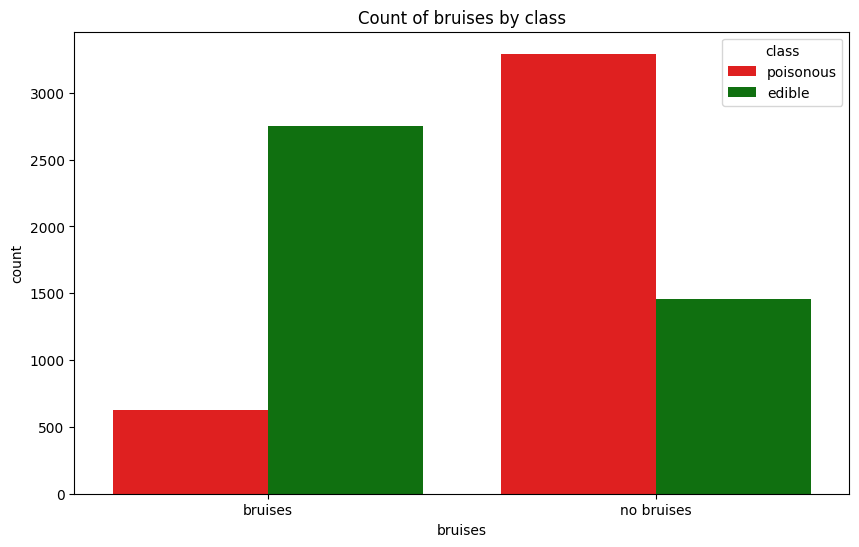

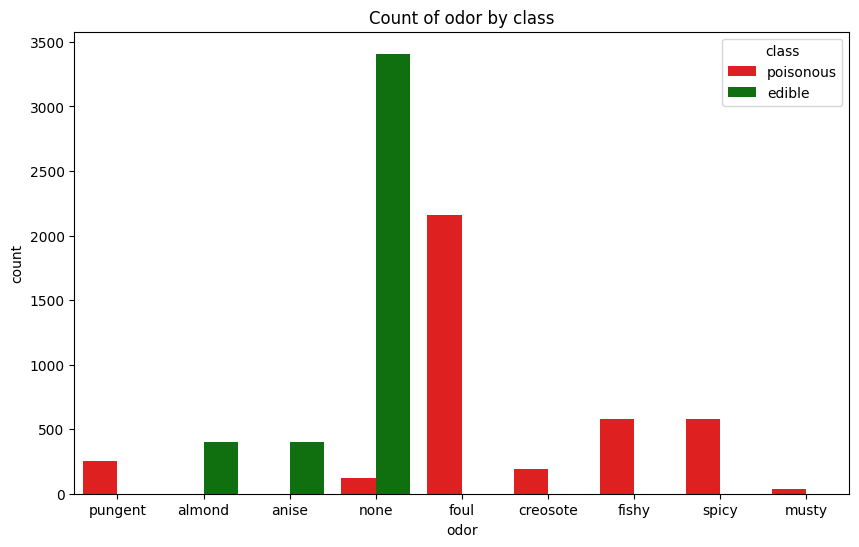

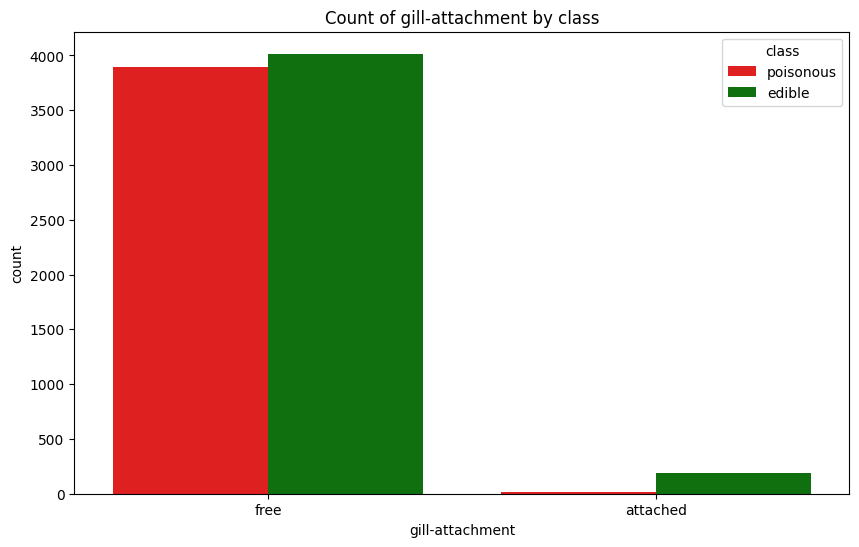

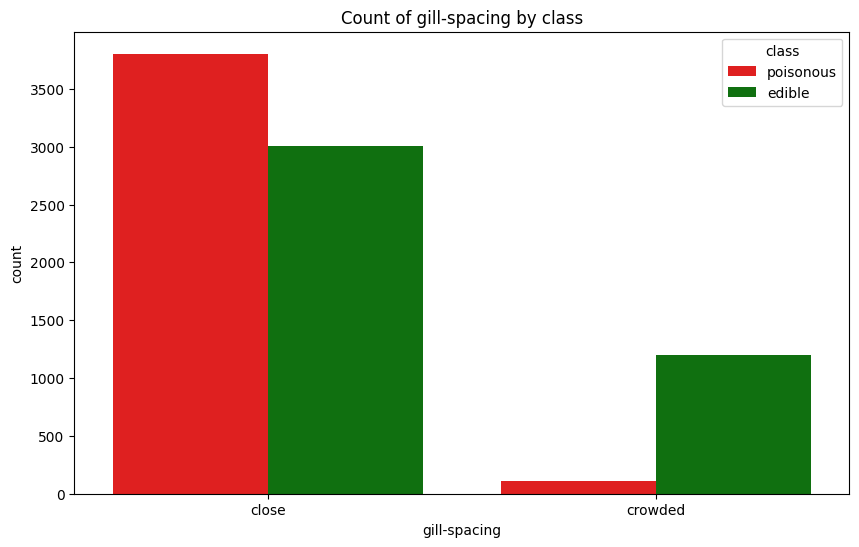

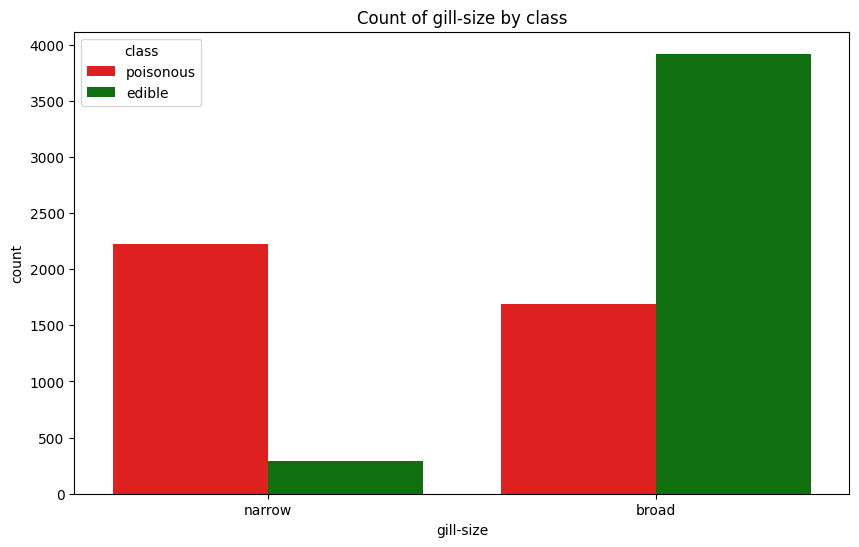

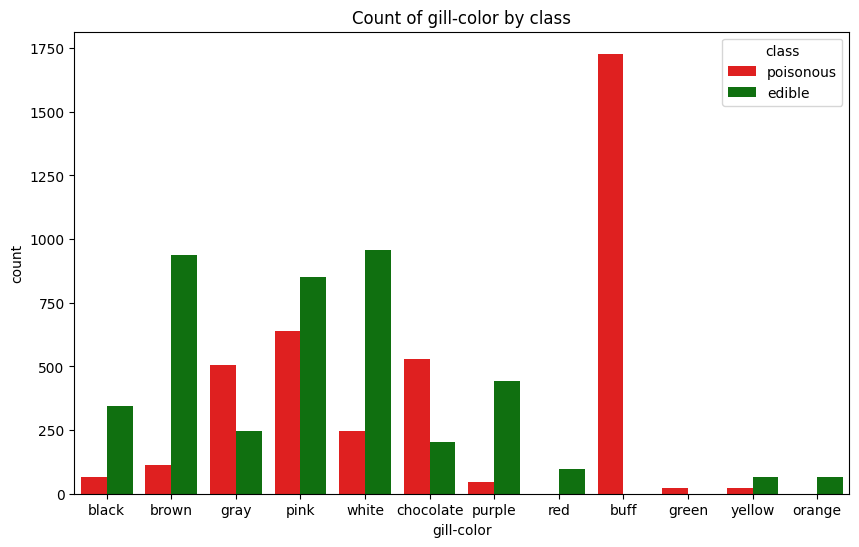

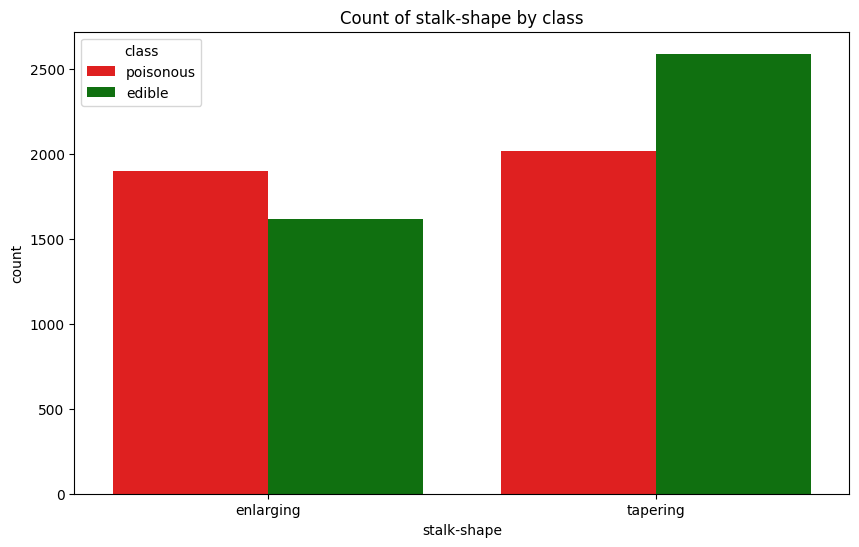

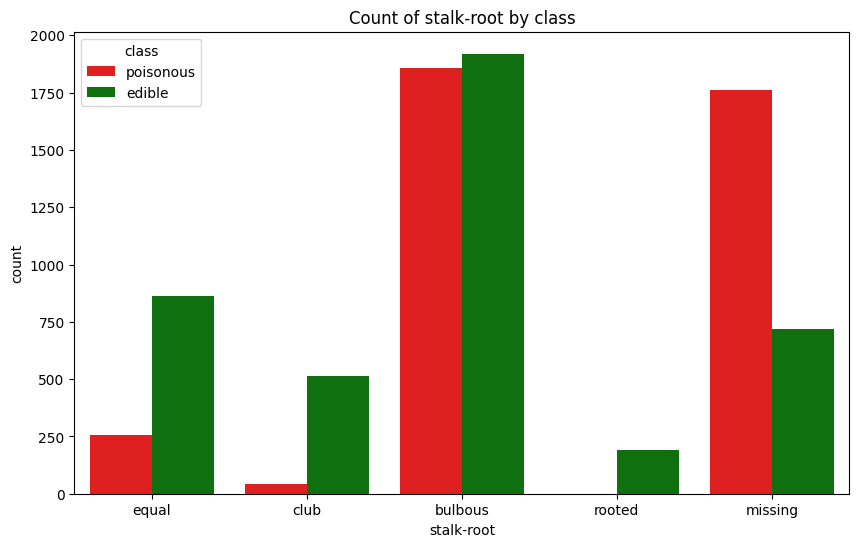

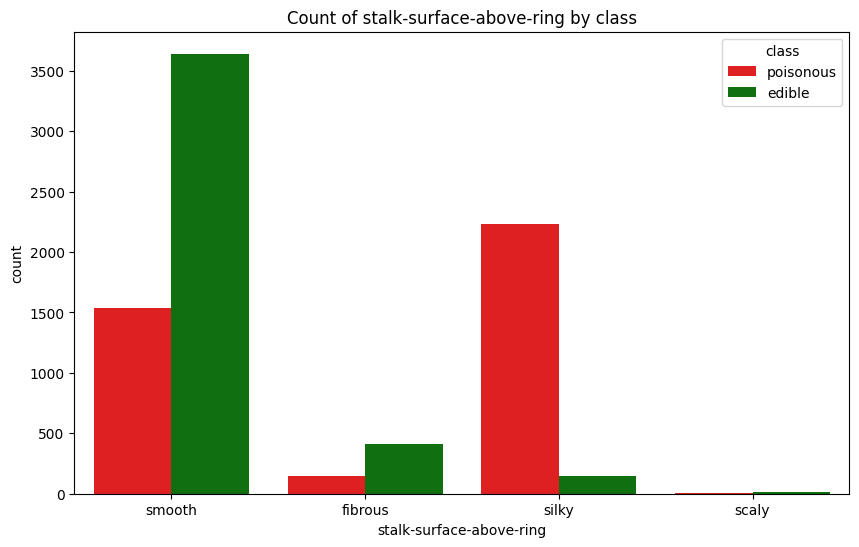

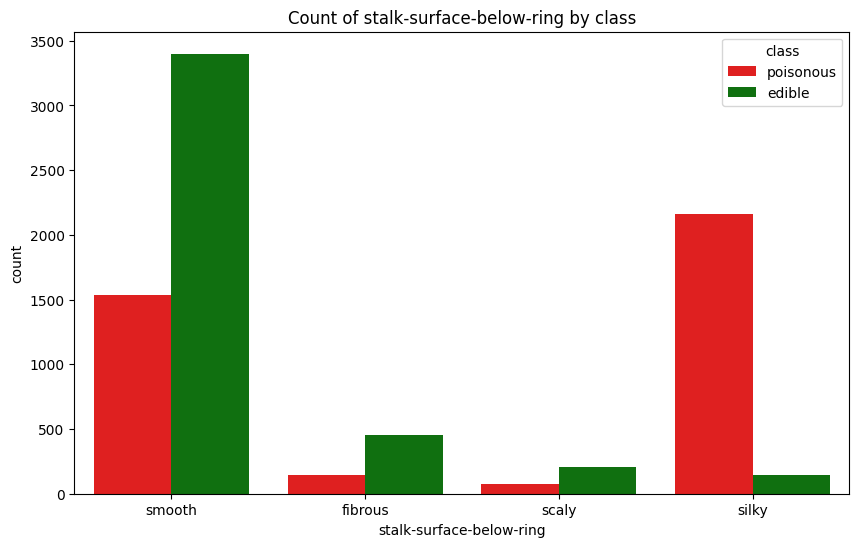

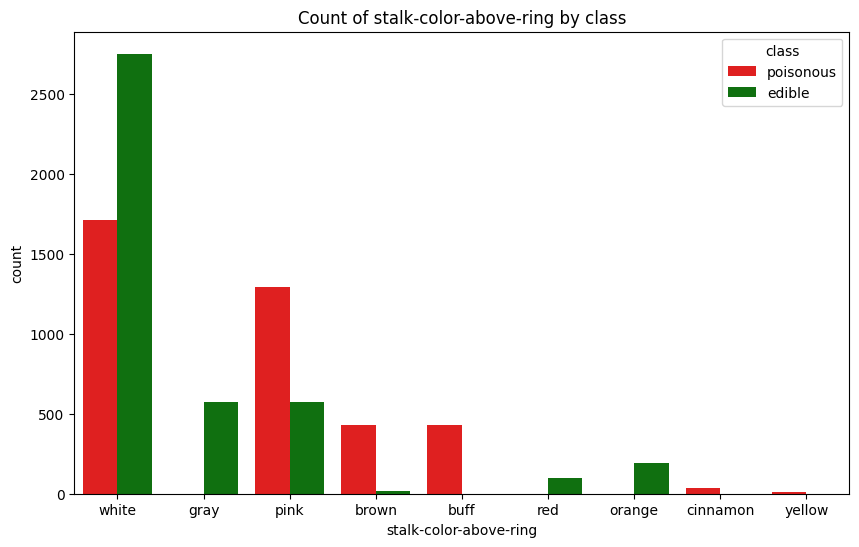

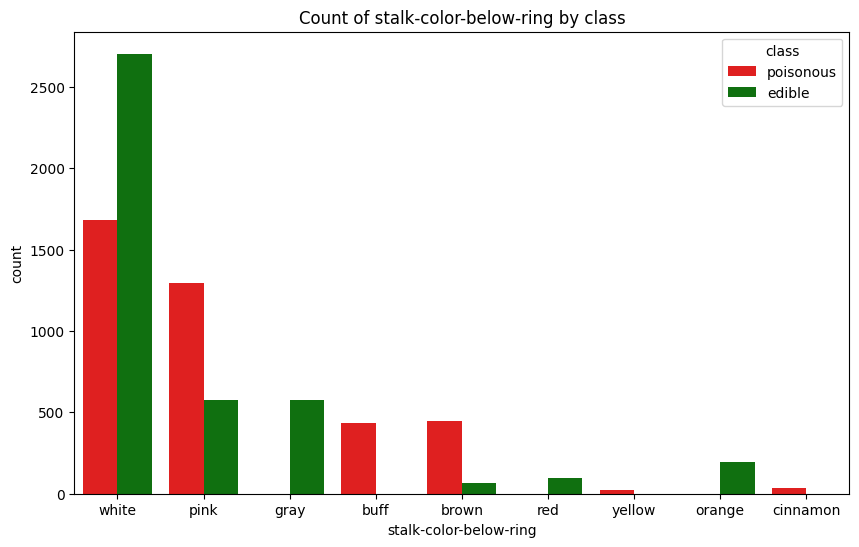

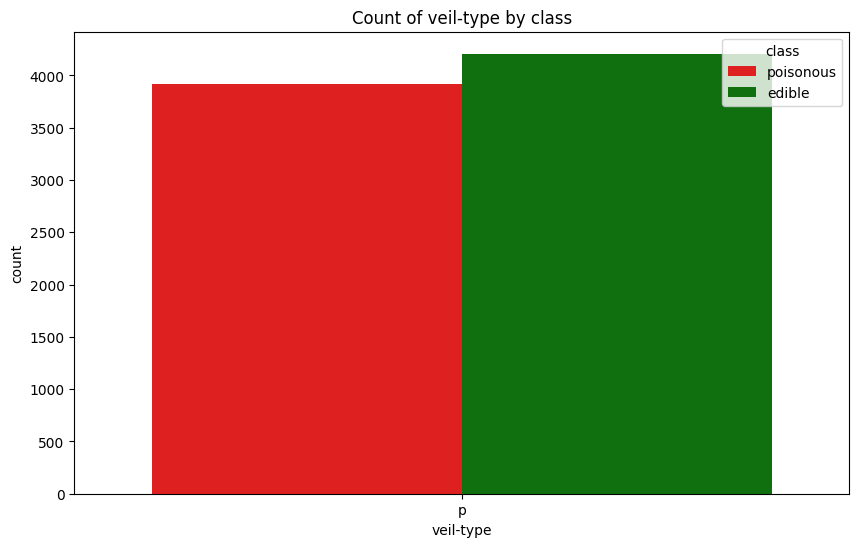

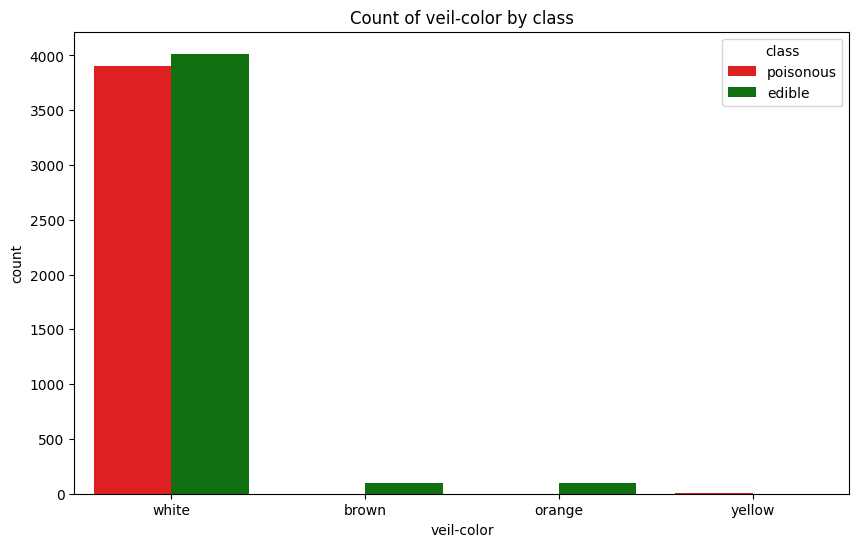

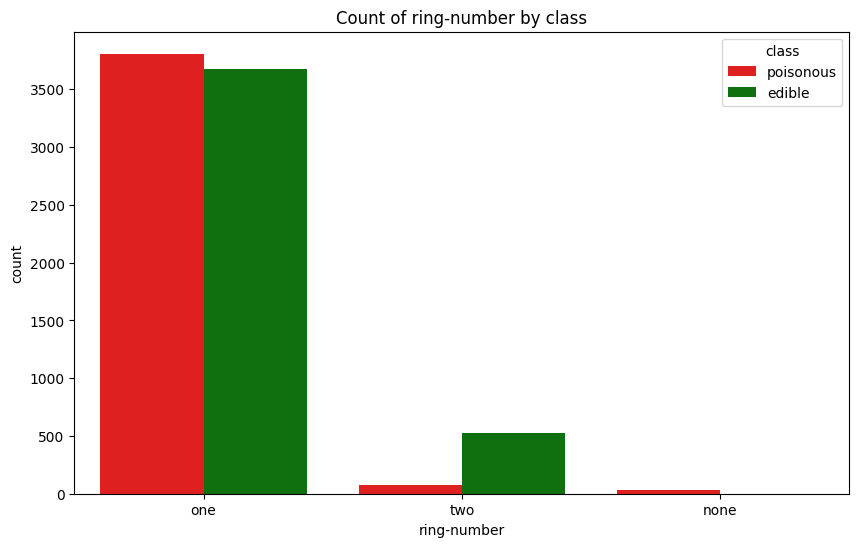

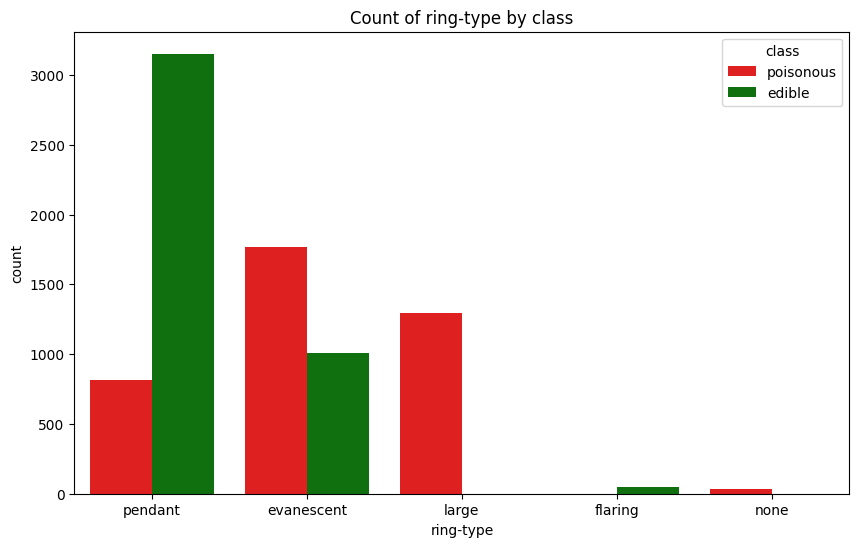

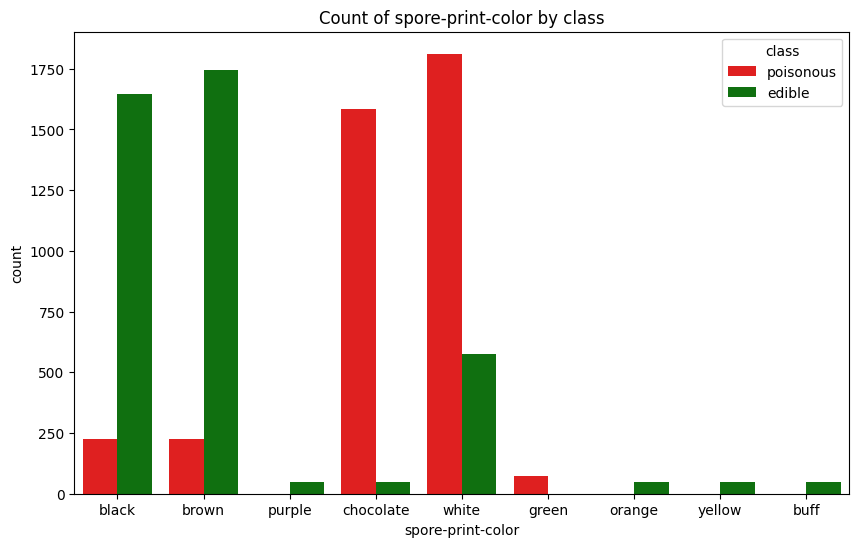

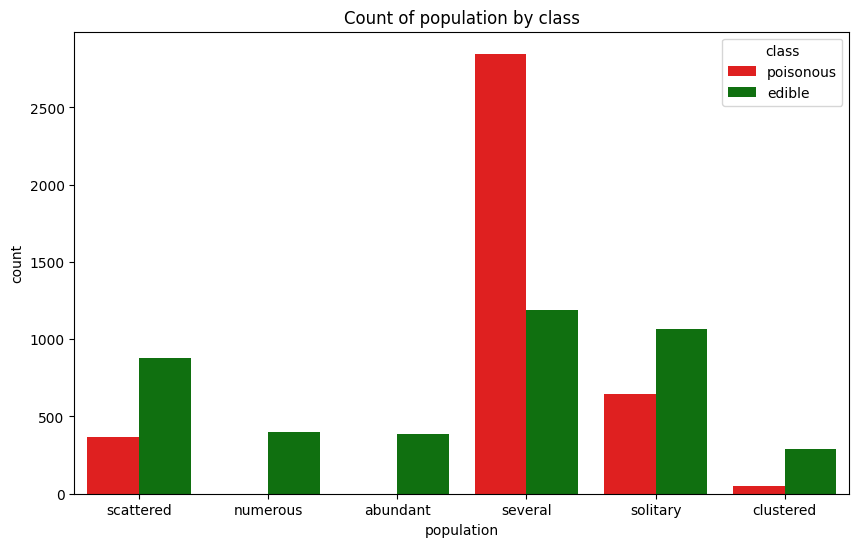

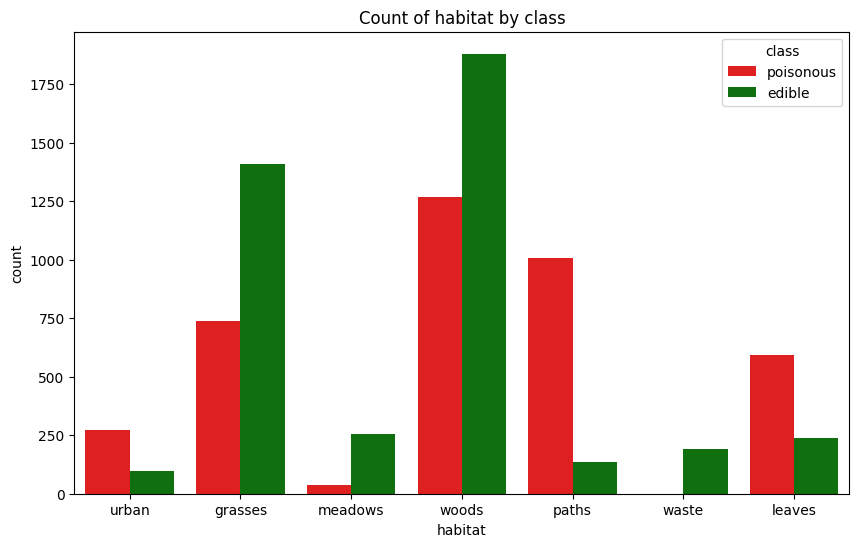

In [261]:
for col in df_vis.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df_vis, hue='class', palette={'edible': 'green', 'poisonous': 'red'})
    plt.title(f'Count of {col} by class')
    plt.xticks(rotation=0)
    plt.show()

- **Bivariate/Multivariate Analysis**:
  - Explore relationships between features (e.g., scatter plots, correlation heatmap).


/Users/abhishek/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


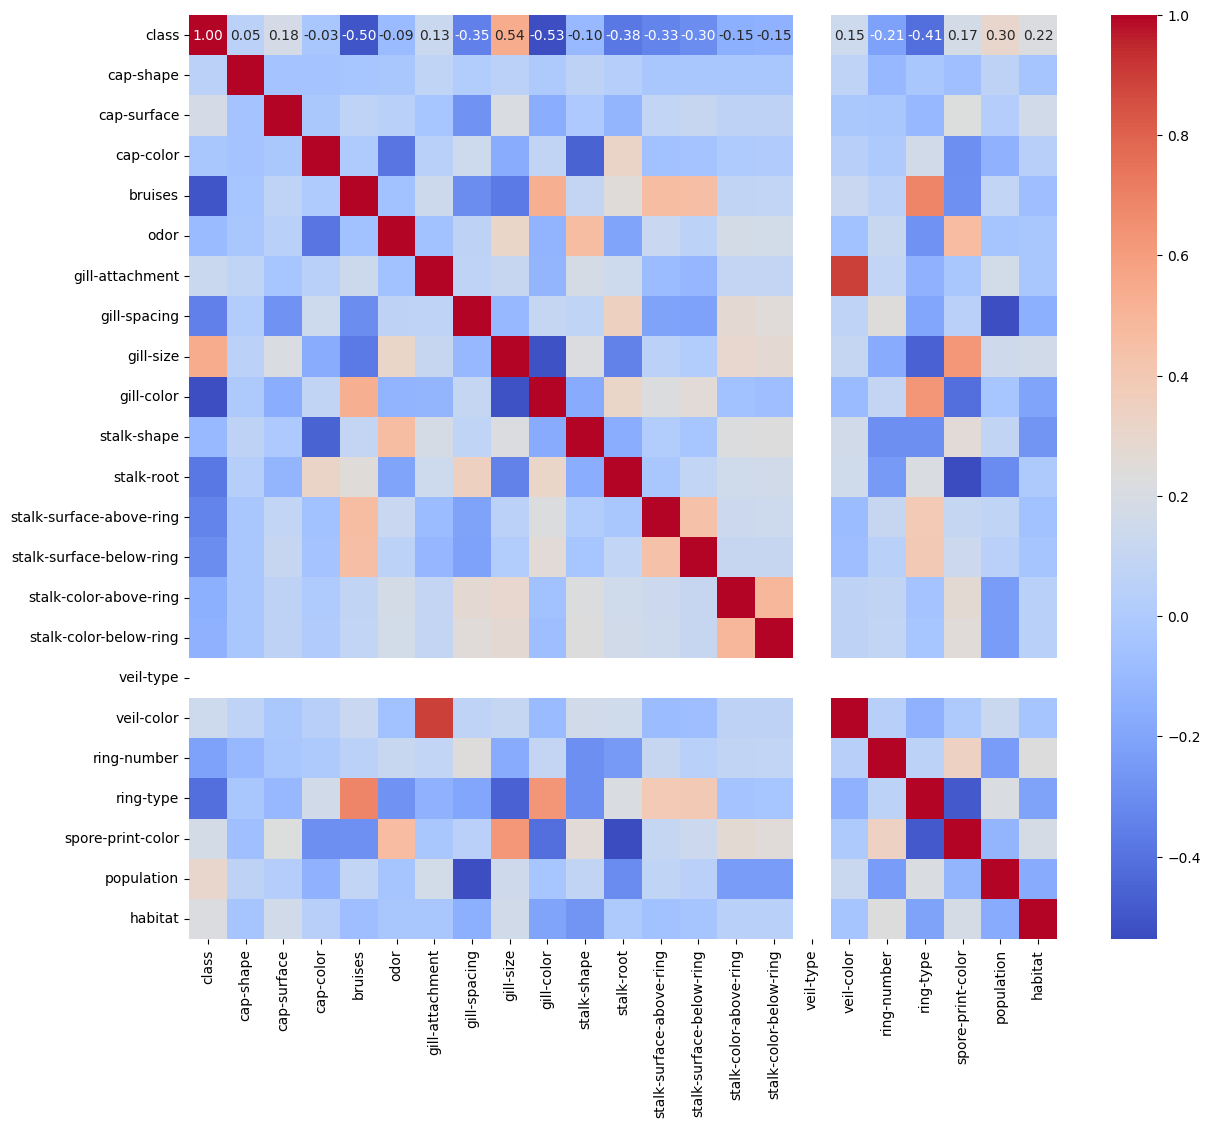

In [262]:
df_label = df.copy()
# checking the correlation between the features using heatmap scikit learn
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df_label.columns:
    df_label[col] = labelencoder.fit_transform(df_label[col])
    
plt.figure(figsize=(14, 12))
sns.heatmap(df_label.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()




- **Insights**:
  - Summarize findings from the data analysis.

## 4. Data Preprocessing

- **Feature Selection**:
  - Remove irrelevant or redundant features.


In [263]:
df.drop(columns=['veil-type'], inplace=True)

- **Feature Engineering**:
  - Create new features or transform existing ones.


- **Data Transformation**:
  - Normalize/standardize data, handle categorical variables (e.g., encoding).


In [264]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Ensure all columns are of type 'str'
df = df.astype(str)

# Columns for ordinal encoding with their mappings
ordinal_columns = ['class', 'bruises', 'gill-attachment', 'gill-spacing', 
                   'gill-size', 'stalk-shape', 'ring-number']

# Define custom order for ordinal encoding
ordinal_mappings = [
    ['e', 'p'],        # class
    ['f', 't'],        # bruises
    ['f', 'a'],        # gill-attachment
    ['c', 'w', 'd'],   # gill-spacing
    ['n', 'b'],        # gill-size
    ['t', 'e'],        # stalk-shape
    ['n', 'o', 't']    # ring-number
]

# Apply ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=ordinal_mappings)
df[ordinal_columns] = ordinal_encoder.fit_transform(df[ordinal_columns])

# Apply label encoding for remaining columns
label_encoded_columns = [col for col in df.columns if col not in ordinal_columns]
label_encoder = LabelEncoder()

for col in label_encoded_columns:
    df[col] = label_encoder.fit_transform(df[col])

- **Splitting the Data**:
  - Cross-validation setup.

In [265]:
X = df.drop('class', axis=1)  
y = df['class']

- **Splitting the Data**:
  - Train-test split was not used as we are using Cross-validation!!

In [266]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


- **Function to get the model perfornamnce**:
  - Accuracy, Precision, Recall, F1-score are used

In [267]:
# Global dictionary to store performance metrics
performance_metrics = {}

In [268]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

# Global dictionary to store performance metrics
performance_metrics = {}

def evaluate_model(model, model_name, X, y, use_scaling=False):
    """
    Function to compute and plot a confusion matrix from cross-validation results.

    Args:
    - model: The machine learning model (already initialized).
    - model_name: The name of the model as a string.
    - X: Features dataset.
    - y: Target labels.
    - use_scaling: Whether to apply feature scaling (default: False).

    Returns:
    - None (Plots the confusion matrix).
    """
    # Apply scaling if required
    if use_scaling:
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    # Perform cross-validation predictions
    y_pred = cross_val_predict(model, X, y, cv=5)

    # Compute confusion matrix
    cm = confusion_matrix(y, y_pred)
    
    # Compute performance metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    # Store results in a dictionary
    performance_metrics[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    # Print Performance Metrics
    print(f"Performance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    



## 5. Baseline Model



- **Model Selection**:
  - Describe the baseline model.



In [269]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
baseline_model = LogisticRegression(random_state=42)




- **Training**:
  - Train the baseline model.


In [270]:
evaluate_model(baseline_model, 'Logistic Regression', X, y)

/Users/abhishek/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abhishek/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Performance Metrics for Logistic Regression:
Accuracy: 0.8458
Precision: 0.8459
Recall: 0.8458
F1 Score: 0.8458


/Users/abhishek/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abhishek/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

## 6. Advanced Models
- **Model Selection**:
  - List the advanced models being used (e.g., Random Forest, Neural Networks).
- **Implementation**:
  - Train each model with appropriate hyperparameters.
- **Evaluation**:
  - Evaluate each model using metrics and compare with the baseline.
- **Optimization**:
  - Perform hyperparameter tuning (e.g., grid search, random search).
- **Results**:
  - Document performance improvements.



In [271]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

evaluate_model(rf_model, 'Random Forest', X, y)

Performance Metrics for Random Forest:
Accuracy: 0.9031
Precision: 0.9052
Recall: 0.9031
F1 Score: 0.9031


In [272]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='rbf', random_state=42)

evaluate_model(svm_model, 'SVM', X, y, use_scaling=True)

Performance Metrics for SVM:
Accuracy: 0.8703
Precision: 0.8746
Recall: 0.8703
F1 Score: 0.8702


In [273]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

evaluate_model(mlp_model, 'MLP', X, y, use_scaling=True)

Performance Metrics for MLP:
Accuracy: 0.8853
Precision: 0.8884
Recall: 0.8853
F1 Score: 0.8852


## 7. Results and Analysis
- **Comparison of Models**:
  - Summarize the performance of all models in a table or chart.
- **Best Model**:
  - Highlight the best-performing model and justify its selection.
- **Error Analysis**:
  - Analyze misclassifications or model weaknesses.




### Final Model Performance Summary ###
                     accuracy  precision    recall  f1_score
Logistic Regression  0.845766   0.845857  0.845766  0.845790
Random Forest        0.903127   0.905212  0.903127  0.903133
SVM                  0.870261   0.874561  0.870261  0.870164
MLP                  0.885278   0.888398  0.885278  0.885247


<Figure size 1000x600 with 0 Axes>

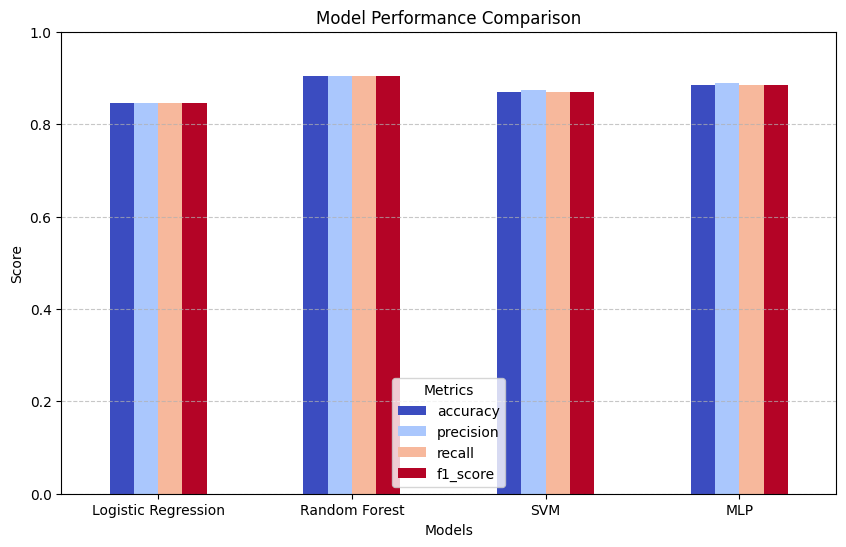

In [274]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert performance metrics dictionary into a DataFrame
performance_df = pd.DataFrame.from_dict(performance_metrics, orient='index')

# Print summary table
print("### Final Model Performance Summary ###")
print(performance_df)

# Plot performance metrics
plt.figure(figsize=(10, 6))
performance_df.plot(kind='bar', figsize=(10, 6), colormap='coolwarm', rot=0)
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Score")
plt.ylim(0, 1)  # Since all metrics range from 0 to 1
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
